<a href="https://colab.research.google.com/github/msremigio/DS/blob/master/avaliacao_tecnica_indt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Matheus Silveira Remigio
31/01/2023

Linkedin: linkedin.com/in/msremigio
Medium: medium.com/@msremigio
Github: github.com/msremigio
```




# Análise Exploratória: Manutenção Preditiva na Indústria
>> Dados reais de manutenções preditivas feitas na indústria

O [Repositório de Machine Learning da *University of California, Irvine (UCI)*](https://archive.ics.uci.edu/) é um ambiente público que fornece acesso a centenas de conjuntos de dados para serem utilizados pela comunidade de *data science/machine learning* com propósito acadêmico e experimental para modelos de aprendizado de máquina. É desse repositório público que os dados utilizados nessa análise foram retirados.

Nesse contexto, o banco de dados que iremos utilizar é o [*AI4I 2020 Predictive Maintenance Dataset Data Set*](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset#). Um conjunto de dados sintetizado para refletir manutenções preditivas reais feitas na indústria. Segundo informações do *site*, esse banco de dados possui `10000` registros associados a `14` atributos (características que vamos explorar adiante) e foi doado ao repositório no dia `30/08/2020`.

# Aquisição dos dados

Vamos começar importando as bibliotecas/módulos do Python que iremos usar durante a exploração dos dados e carregar o conjunto de dados fornecido numa estrutura *DataFrame* usando o `Pandas`.

O arquivo original tem o nome `ai4i2020.csv`, porém renomeei para um nome mais sugestivo (`ai4i2020_predictive_maintenance.csv`).

In [35]:
# Importando módulos utilizados ao longo do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exibição dos plots logo abaixo do comando
%matplotlib inline

# Importando o arquivo .csv dos dados para uma estrutura DataFrame do Pandas
df = pd.read_csv('https://raw.githubusercontent.com/msremigio/DS/master/datasets/ds_indt/ai4i2020_predictive_maintenance.csv')

# Análise exploratória dos dados

Nesse primeiro momento, vamos conferir rapidamente as informações referentes ao tamanho do *data set* de acordo com o repositório da *UCI*.

**Q1. Quantas linhas (entradas) e quantas colunas (atributos) existem no *DataFrame*?**

In [12]:
# "Forma" do conjunto de dados | shape = (linhas, colunas)
print(f'Registros:\t{df.shape[0]}')
print(f'Atributos:\t{df.shape[1]}')

Registros:	10000
Atributos:	14


Validando o tamanho do conjunto de dados, vamos entender melhor cada um dos `14` atributos e o que eles representam.

**Dicionário dos atributos**

* UID - Número de identificação único do registro - variando de `1` a `10000`;

* *Product ID* - Consiste de uma letra como variante da qualidade do produto concatenada a um número serial específico da variante:
>* L (low) - qualidade baixa (`50%` de todos os produtos);
>* M (medium) - qualidade média (`30%` dos produtos);
>* H (high) - qualidade alta (`20%` dos produtos);

* *Type* - Consiste no valor da primeira letra (L/M/H) exposta na variável *Product ID*, referente as variantes de qualidade do produto;

* *Air temperature \[K\]* - Temperatura do ar, gerada por um processo de passeio aleatório e normalizada com média de `300 K` e desvio padrão de `2 K`;

* *Process temperature \[K\]* - Temperatura do processo, gerada por um processo de passeio aleatório e normalizada com média equivalente a temperatura do ar `+ 10 K` e desvio padrão de `1 K`;

* *Rotational speed \[rpm\]* - Velocidade de rotação calculada a partir de uma potência de `2860 W`, sobreposta por um ruído com distribuição normal;

* *Torque \[Nm\]* - Valores de torque, que são normalmente distribuídos em torno de `40 N⋅m` com um valor de `Ïƒ = 10 N⋅m` (desvio padrão), sem valores negativos;

* *Tool wear \[min\]* - Tempo de desgaste da ferramenta. As variantes de qualidade H/M/L adicionam `5/3/2 minutos`, respectivamente, ao tempo de desgaste na ferramenta utilizada no processo;

* *Machine failure*	- Rótulo que indica se a máquina falhou para esse registro específico, desde que algum modo de falha seja verdadeiro.


Nesse conjunto, existem `5` modos independetes de falha para uma máquina:


* *Tool Wear Failure \[TWF\]*: Falha por desgaste da ferramenta. A ferramenta será substituída por outra, selecionada randomicamente e com tempo disponível de desgaste entre `200~240 minutos` (acontece `120` vezes nesse conjunto de dados). Até esse momento, das `120` vezes, a ferramenta foi substituída `69` vezes, e falhou `51` vezes (atribuídos aleatoriamente);

* *Heat Dissipation Failure \[HDF\]*: Falha por dissipação de calor. A dissipação de calor causa falha no processo se a diferença entre a temperatura do ar e do processo fica abaixo de `8.6 K` e a velocidade de rotação da ferramenta abaixo de `1380 rpm`. Esse é o caso em `115` registros;

* *Power Failure \[PWF\]*: Falha pela Potência. A potência requerida pelo processo é calculada pelo produto entre o torque e a velocidade de rotação (em `rad/s`). Se esse valor está abaixo de `3500 W` ou acima de `9000 W`, o processo falha. Esse é o caso em `95` registros do *data set*.

* *Overstrain Failure \[OSF\]*: Falha por trabalho excessivo. Se o produto entre o tempo de desgaste da ferramenta e o torque exceder `11000 min⋅N⋅m`, `12000 min⋅N⋅m`, `13000 min⋅N⋅m` para as variantes de produto L, M e H, respectivamente, o processo falha. Acontecendo em `98` pontos desse conjunto de dados;

* *Random Failures \[RNF\]*: Falhas aleatórias. Cada processo tem `0.1%` de chance de falhar, independente dos parâmetros de processo. Esse é o caso para `5` registros, menos do que se esperaria para `10000` pontos (`10` ocorrências).

Se qualquer um dos modos de falha acima forem encontrados, o processo falha e o rótulo ***Machine failure*** é definido como `1`. Dessa forma, não é transparente para o modelo de *Machine Learning (ML)* qual dos modos causou a falha do processo.


--


Vamos observar como essas características estão dispostas nos dados observando as `20` primeiras entradas do *DataFrame*:

In [13]:
# Exibe os primeiros (N) registros do DataFrame
df.head(20)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


A primeira observação é um erro no nome o atributo `UID`, que está nomeado como `UDI`. Como essa variável não tem importância para um futuro modelo de predição, vamos desconsiderá-la mais adiante.

Ao observar os `20` primeiros registros já é possível classificar as variáveis entre numéricas (discretas e contínuas) ou categóricas (ordinais e nominais). Porém, para confirmar essa distinção vamos utilizar o objeto `dtypes`.

**Q2. Quais os tipos das variáveis/atributos?**

In [14]:
# Exibe qual o tipo do dado para cada atributo (coluna)
print(df.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


Partindo da confirmação com o resultado obtido da saída do objeto `dtypes`, podemos definir diretamente que as variáveis estão organizadas como:

*Atributos numéricos:*
 * **Discretos:**
  * UID - Rotational speed - Tool wear - Machine failure - TWF - HDF - PWF - OSF - RNF
  
 * **Contínuos:**
   * Air temperature - Process temperature - Torque

*Atributos categóricos:*
  * **Nominais:**
    * Type
  * **Ordinais:**
    * Product ID


Continuando na exploração inicial do *DataFrame*, a próxima curiosidade pode ser referente a existências de valores ausentes nos atributos (embora o próprio repositório afirme que não existem valores ausentes, é importante validar essa informação para evitar qualquer surpresa).


**Q3. Existem valores ausentes no *DataFrame*? Quantos?**

In [15]:
# Soma do número de valores nulos no DataFrame, por coluna
#print(f'{"Using the isnull() method":-^50}\n\n')
print(df.isnull().sum().sort_values(ascending=False))

# Em porcentagem (se preferir)
# display(((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False))

# O método info() também poderia ser usado para responder Q1, Q2 e Q3 simultaneamente
#print(f'\n\n{"Using the info() method directly":-^50}\n\n')
#df.info()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


Desse último resultado podemos observar que de fato não existem valores faltantes nessa amostra.

Continuando, também é importante ter uma visão numérica e intuitiva das medidas de tendência central e dispersão do conjunto de dados, como uma medida precoce para identificar algum comportamento incomum e também ter uma noção inicial de possíveis valores discrepantes no *data set*.

**Q4. Existem valores discrepantes (*outliers*) no *data set*?**

Como primeiro passo para investigar a existência de *outliers* nos dados, podemos utilizar o método `describe()` do objeto *DataFrame* do **Pandas**, e observar os valores das medições. Esse método exibe um resumo estatístico simples tanto de variáveis numéricas (padrão), quanto de variáveis categóricas (incluídas opcionalmente - parâmetro `include=['O']`). 

In [16]:
# Exibir um resumo estatístico dos atributos numéricos
print(f'{"Método decribe() aplicado a variáveis numéricas":-^100}\n')
display(df.describe())

# Exibir um resumo estatístico dos atributos categóricos
print(f'\n{"Método decribe() aplicado a variáveis categóricas":-^100}\n')
display(df.describe(include=['O']))

---------------------------Describe method applied to numerical variables---------------------------



,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000



--------------------------Describe method applied to categorical variables--------------------------



,Product ID,Type
count,10000,10000
unique,10000,3
top,M14860,L
freq,1,6000


Olhando para as estatísticas das variáveis numéricas, é possível confirmar de imediato que algumas informações fornecidas pelo doador dos dados públicos são verídicas. Para a variável *Air temperature*, por exemplo, fica claro que os valores seguem uma distribuição em que a média está em torno de `300 K` e o desvio padrão é de aproximadamente `2 K`, como havio sido descrito anteriormente. O mesmo acontece para os atributos *Process temperature* e *Torque*. 

Observando os valores exibidos para as variáveis que fazem sentido (*Air temperature* até *Tool wear*) há indicativos ou evidências de valores discrepantes para as variáveis *Rotational speed* e *Torque*. Para as duas primeiras (*Air temperature* e *Process temperature*), não há evidências já que os `quartis` estão com um espaçamento coerente e os valores `max` e `min` não estão tão afastados da distância interquartil para essas variáveis numéricas.

Vamos confirmar essas observações de forma visual com os `box plots` abaixo:

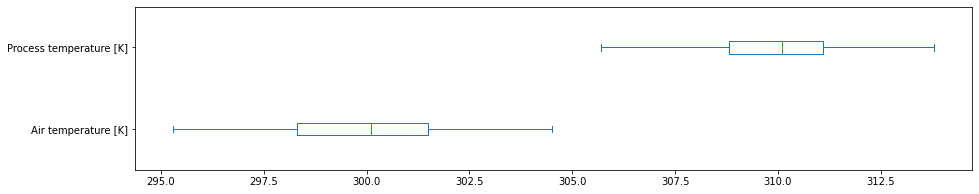

In [3]:
# Exibição dos box plots para as variáveis sem suspeita de outliers
df[['Air temperature [K]', 'Process temperature [K]']].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Os valores dispostos para essas duas variáveis estão coerentes dentro dos valores médios esperados e seus desvios. Então não é coerente afirmar que houveram erros de qualquer natureza nas medições desses atributos.

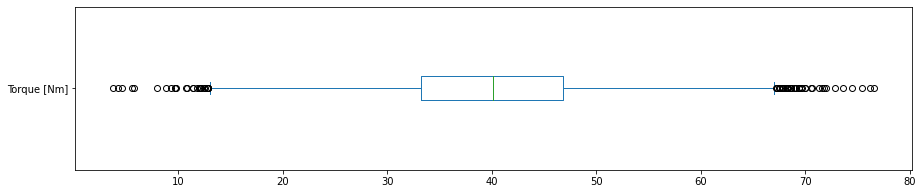

In [18]:
# Exibição dos box plots para a variável Torque [Nm] (com suspeita de outliers)
df[['Torque [Nm]']].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

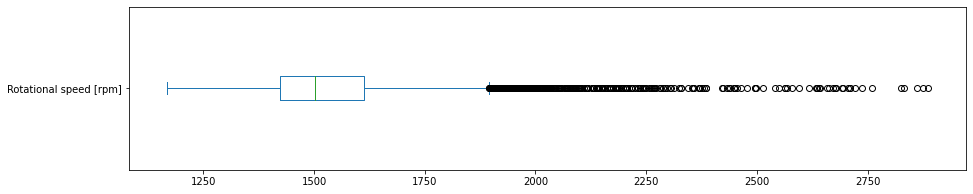

In [19]:
# Exibição dos box plots para a variável Rotational speed [rpm] (com suspeita de outliers)
df[['Rotational speed [rpm]']].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Para as variáveis *Torque* e *Rotational speed* a situação é diferente. A primeira expõe valores discrepantes tanto na direção do limite inferior quanto do superior. Já a segunda só apresenta valores com grande desvio no sentido do limite superior.

Pode-se concluir erroneamente que os *outliers*, nesse caso, são resultado de algum tipo de erro ou inconsitência nas medições ou síntese do *data set*, mas acredito que esse não seja o caso, pois para alguns modos de falha essas variáveis são determinantes. E são justamente esses pontos discrepantes que motivam a suspeita de que uma falha no maquinário possa ter ocorrido nesses pontos de medição, enfatizando a importância deles para um futuro modelo de predição. 

Por fim, É possível atentar também para uma característica simétrica nos dados, principalmente ao observar os `quartis` e os valores de `max` e `min` das variáveis de temperatura, onde os limites inferior e superior se desviam praticamente em mesma intensidade em relação a média. Isso nos dá indicativos de que os atributos *Air temperature* e *Process temperature* de fato tem características de distribuição normal. Mais uma vez, isso não fica tão evidente para as variáveis *Rotational speed* e *Torque*, ao menos por enquanto. 

Agora, examinando as estatísticas das variáveis categóricas, podemos observar que:

* A variável *Product ID* por si só não tem valor direto para uma predição, uma vez que ela tem papel de identificação apenas, com `10000` valores únicos.

* A variável *Type* indica que a variante de produto mais frequente é o de baixa qualidade (L) e que na verdade essa categoria representa `60%` das amostras, e não `50%` como havia sendo descrito pelo repositórios dos dados.

Para confirmar essa observação, vamos ver as frequências para cada um das `3` categorias: 

In [20]:
# Número de registros por cada tipo de categoria da variável Type
print(df['Type'].value_counts())

L    6000
M    2997
H    1003
Name: Type, dtype: int64


De fato, a categoria L representa `60%` dos dados, a M `≈ 30%` dos dados e a H  `≈ 10%`.


**Q5. Como as variáveis numéricas estão distribuídas?**

Dando continuidade a análise, vamos observar visualmente como os atributos estão distribuídos ao longo do intervalor de valores `min` e `max`. Para isso vamos utilizar `histogramas`.

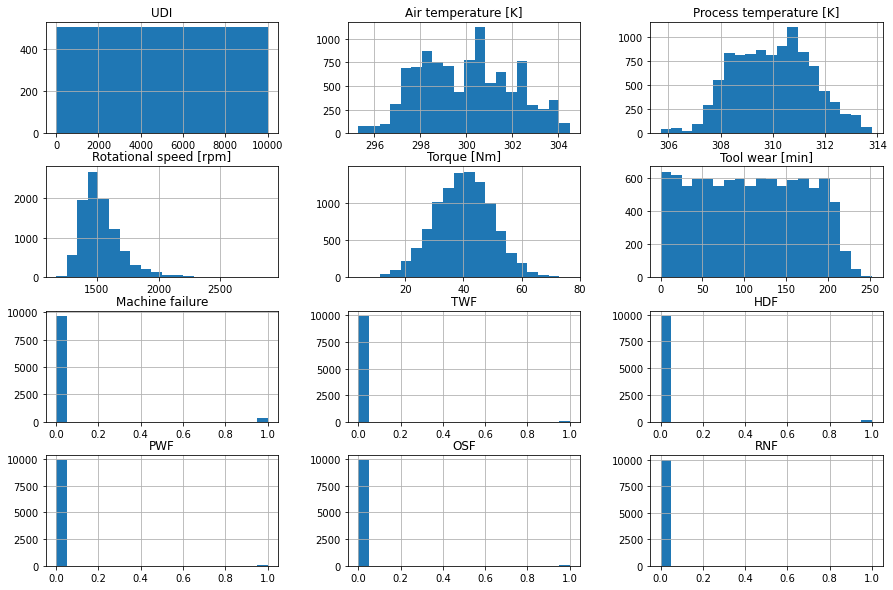

In [21]:
# Exibição dos histogramas baseado nas variáveis numéricas do DataFrame
df.hist(bins=20, figsize=(15,10));

Observando os histogramas, consegue-se ver as características simétricas e normalizadas de algumas das variáveis no qual esse comportamento já era esperado (como já mencionado).

Por outro lado, para as variáveis discretas binárias fica evidente a predominância de amostras que não foram observadas nenhum tipo de falha (acima de `90%`), como calculado abaixo:

In [4]:
# Percentual de ocorrências de falha e não falha
print(f"1: {(((df['Machine failure'] > 0).sum()) / df.shape[0]) * 100:0.2f} %.")
print(f"0: {(((df['Machine failure'] < 1).sum()) / df.shape[0]) * 100:0.2f} %.")

1: 3.39 %.
0: 96.61 %.


Por último, para finalizar a análise isolada de cada atributo, vamos listar a frequências de cada modo de falha, em ordem decrescente:

In [6]:
# Número de ocorrências de falha por modo de falha
df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum().sort_values(ascending = False)

HDF    115
OSF     98
PWF     95
TWF     46
RNF     19
dtype: int64

Pode-se concluir que para os modos de falha *HDF*, *PWF* e *OSF* os número de ocorrências condiz com os valores descritos pelo repositório. Porém para os modos de falha *TWF* e *RNF* os valores não correspondem.

E por fim, podemos ter noção de quantas amostras apresentam falha de maquinário e quantas tem incidência de mais de um modo de falha simultâneo:

In [5]:
# Número de ocorrências dos modos de falha
print(f"{'Ocorrências de modos de falha:':<50}\t {df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum().sum()}")

# Número de ocorrências de falha
print(f"{'Ocorrências de falha:':<50}\t {df['Machine failure'].sum()}")

# Número de falhas causadas por mais de um modo de falha simultâneo
print(f"{'Número de amostras com falhas simultâneas:':<50}\t {df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum().sum() - df['Machine failure'].sum()}")

Ocorrências de modos de falha:                    	 373
Ocorrências de falha:                             	 339
Número de amostras com falhas simultâneas:        	 34


As informações acima também revelam o tamanho do desbanlaceamento nos dados. Em uma *data set* de `10000` amostras, apenas `300~400` apresentam pontos de falha. Questão essa que nos faz pensar em técnicas como *oversampling* e *undersampling* para passos futuros.

Finalizada a análise dos atributos de forma independente um dos outros, vamos começar a pensar no problema como um todo. Levantar questionamentos de relação entre as variáveis e das principais influências para a ocorrência de uma falha. Para isso, precisamos analisar os atributos em conjunto (em pares, normalmente).

Por exemplo, ao analisar os dados tendo em mente o que cada atributo representa, podemos levantar a hipótese de que as variáveis de temperatura têm forte correlação, uma vez que uma é diretamente dependente da outra.

Para os modos de falha, espera-se que cada um tenha uma relação com suas respectivas variáveis de influência (*HDF* com as variáveis de temperatura, *PWF* com *Torque* e *Rotational speed* e assim sucessivamente). Talvez isso não seja observado de forma direta, o que tornaria interessante implementar a criação de novas variáveis a partir das relações entre os atributos originais para tentar obter melhores resultados.

Finalmente, se espera que os modos de falha também apresentem um alta correlação com o atributo *Machine failure*, uma vez que a presença de um modo de falha implica diretamente numa falha de maquinário.

Para confrontar essas hipóteses, podemos utilizar ferramentas visuais que destacam as relações de dependência entre os atributos. Vamos tirar conclusões a partir do `heatmap` e do `pairplot`:

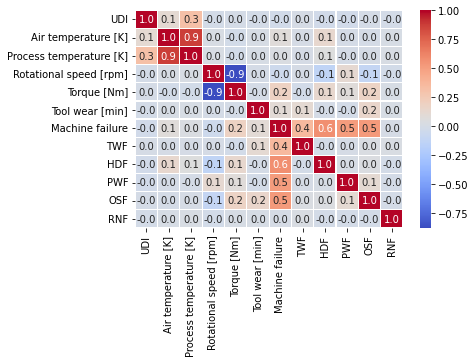

In [25]:
# Exibição de um heatmap baseado nos valores de correlação (corr()) entre os atributos numéricos do DataFrame
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths='0.2', linecolor='white', fmt='0.1f');

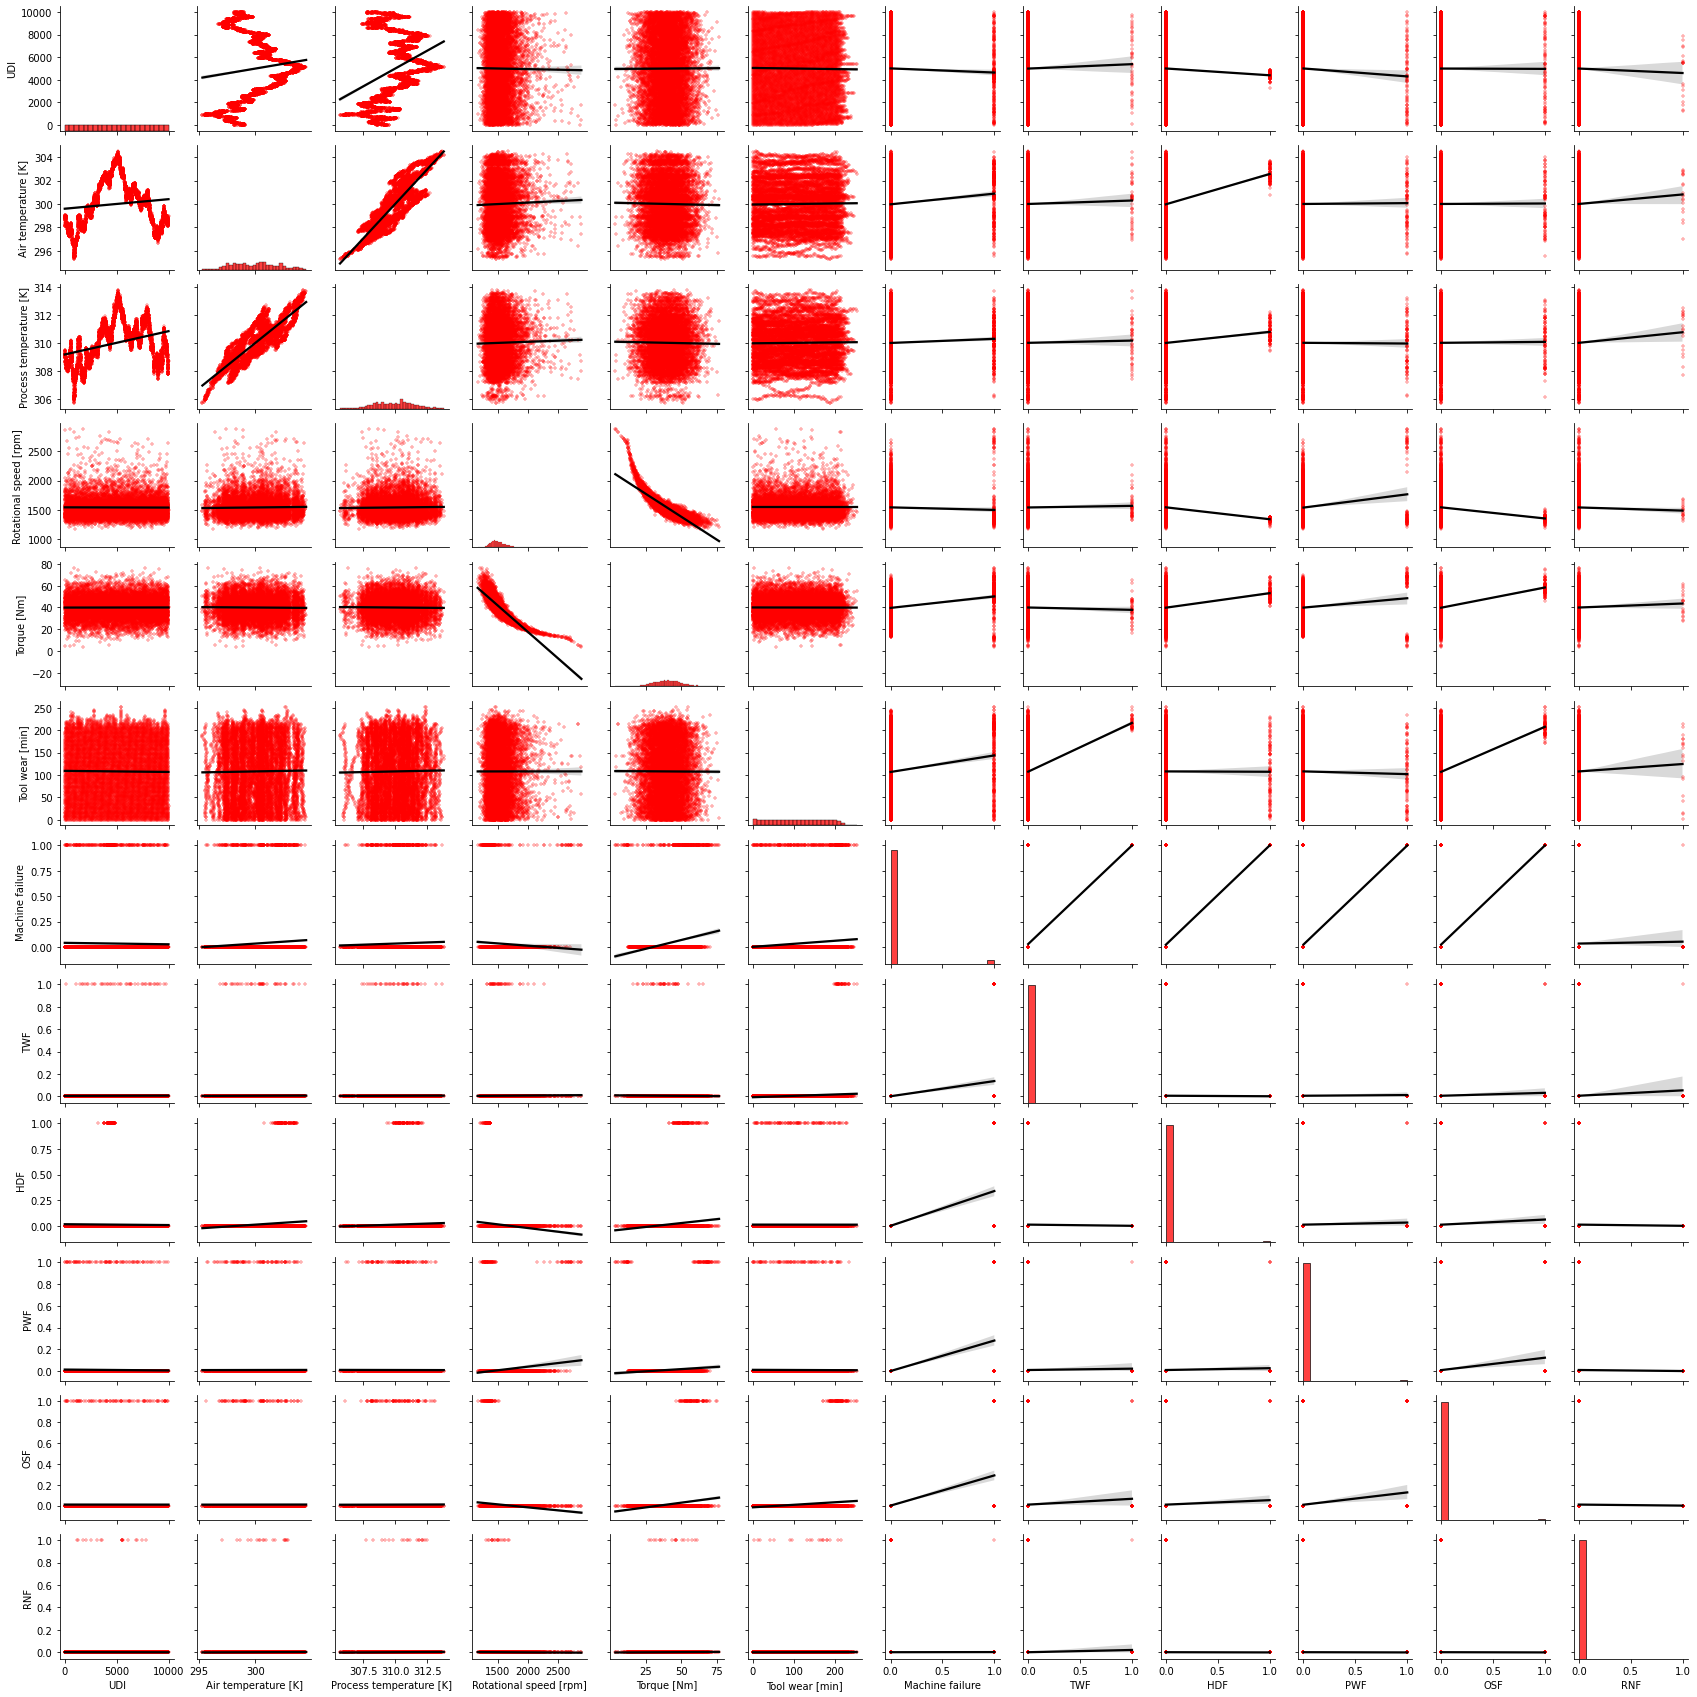

In [40]:
# Exibição de um scatter plot baseado para os atributos numéricos do DataFrame
sns.pairplot(df, height=2, kind='reg', markers='+',
                 plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'color': 'red', 'alpha': 0.3, 's': 10}},
                  diag_kws={'color': 'red'});

O `heatmap` e o `pairplot` confirmam algumas das observações que foram feitas anteriormente, destacam resultados que não haviam sido previstos e acabam não expondo outras informações que eram esperadas.

Para o primeiro ponto, fica evidente a alta correlação entre as variáveis *Air temperature* e *Process temperature*. Além disso se vê valores de correlação relevantes entre os atributos *Machine failure* e o modos de falha.

Sobre o segundo ponto, a análise visual destacou uma correlação negativa (característica inversamente proporcional) entre  o *Torque* e a *Rotational speed* do motor da máquina, algo que fisicamente faz total sentido, uma vez que o torque e a velocidade de rotação são grandezas inversamente proporcionais.

O último ponto se sobressai ao atentar para a falta de correspondência entre as variáveis *Air temperature*, *Process temperature*, *Rotational speed*, *Torque* e *Tool wear* para com as falhas, muito embora o `pairplot` sugira que boa parte dos *outliers* encontrados para os atributos *Torque* e *Rotational speed* se encontram numa zona de falha.


Por fim, existe uma biblioteca/módulo do *Python*, a `sweetviz`, que nos permite fazer todas as análises que realizamos até aqui e ainda nos dá informações extras, de forma simples e direta através de um relatório sobre o *data set*. Vamos abordar ela aqui, embora ela tenha sido utilizada para tirar conclusões nesse projeto.

In [ ]:
# Instalação do módulo sweetviz
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.2 MB/s eta 0:00:00


In [ ]:
# Importando o módulo sweetviz para obter um relatório dos dados
import sweetviz as sv

# Criação e renderização do relatório para os atributos do data set -> (dados, variavel alvo)
my_report = sv.analyze(df, "Machine failure")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



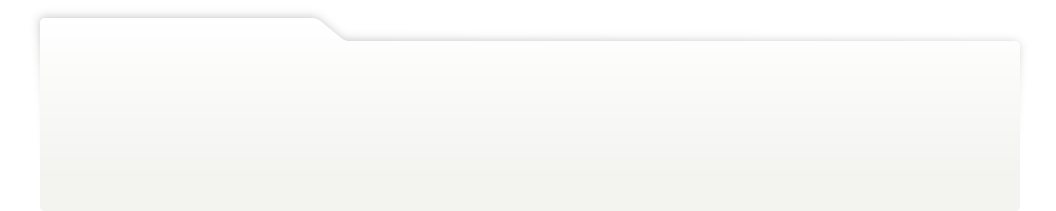
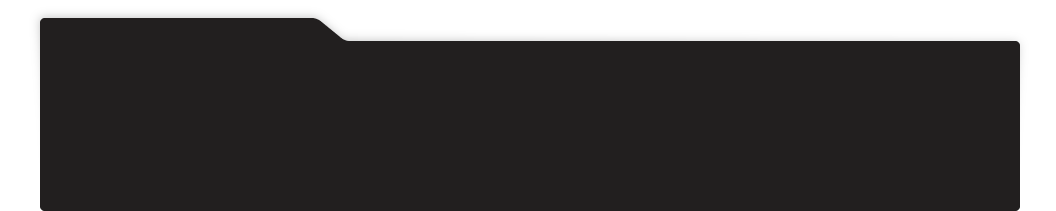
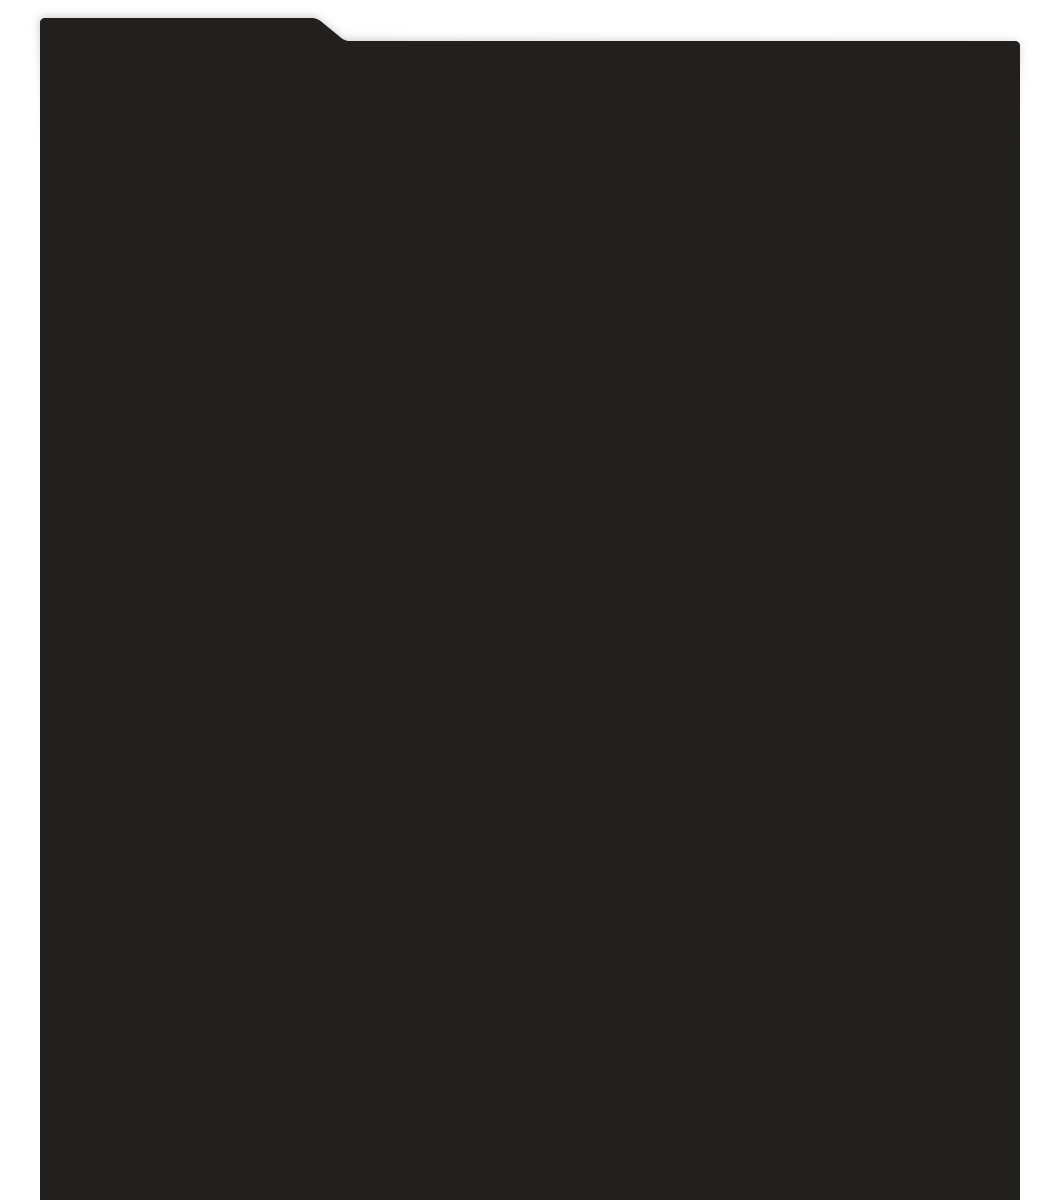
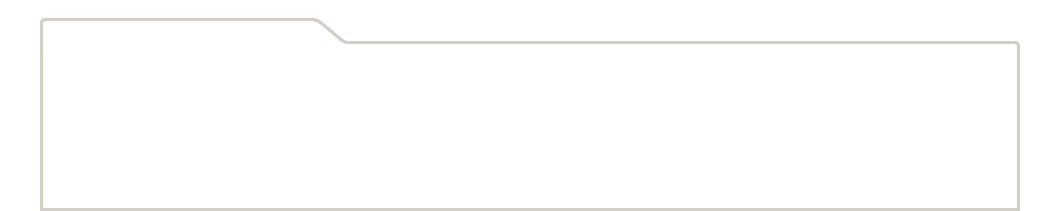
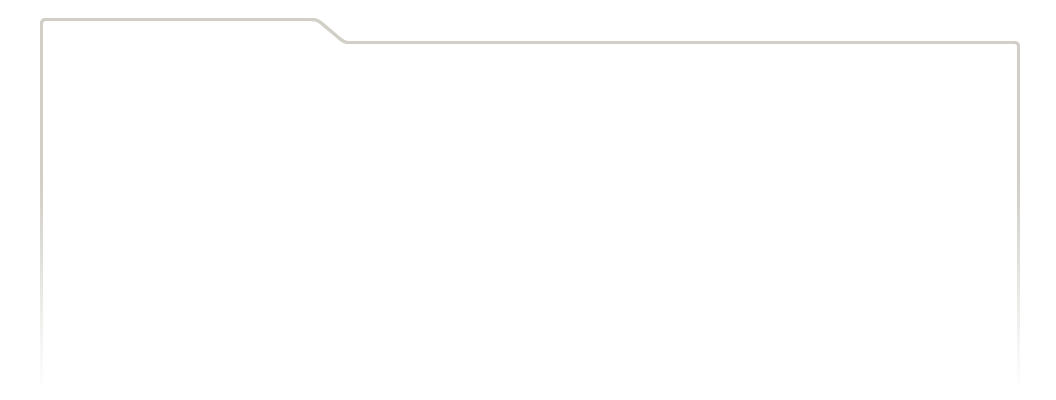
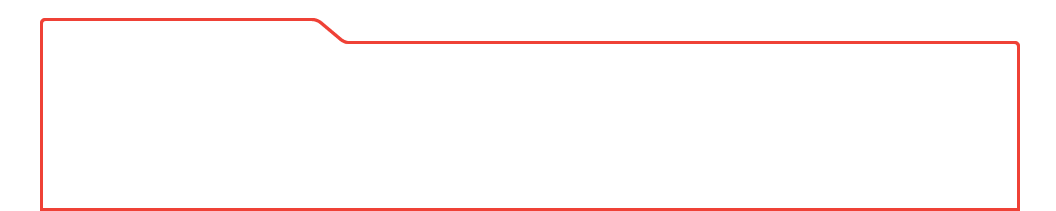
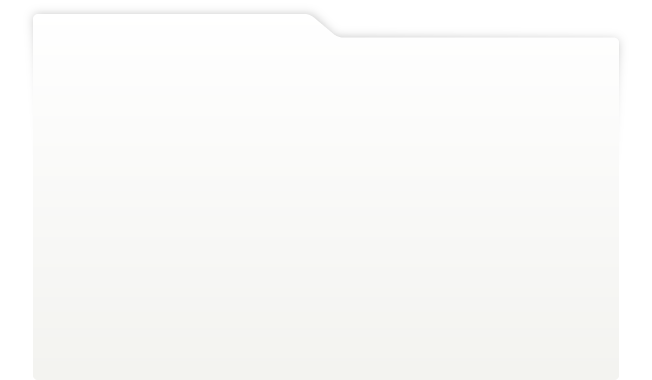
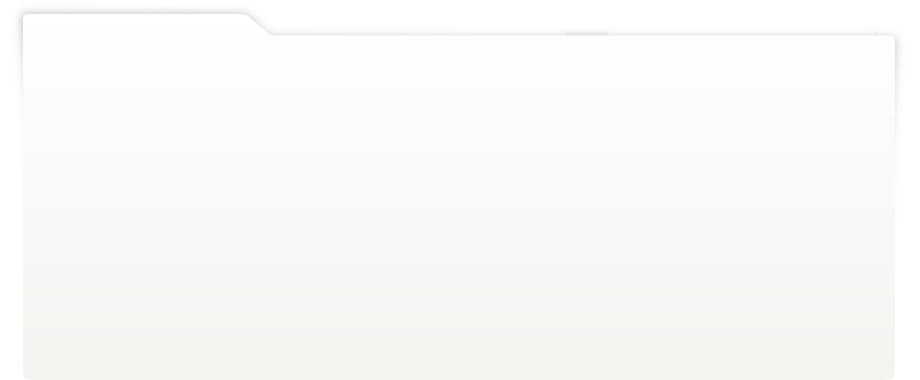
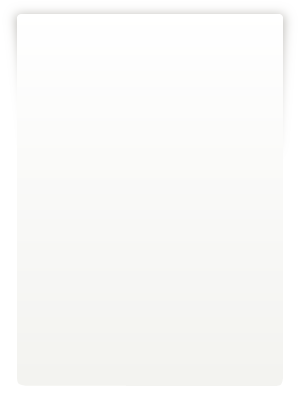
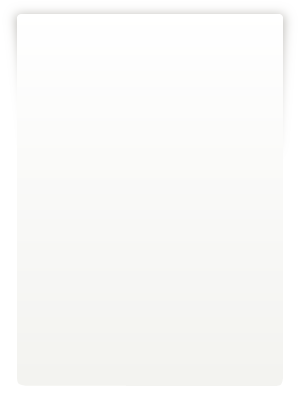
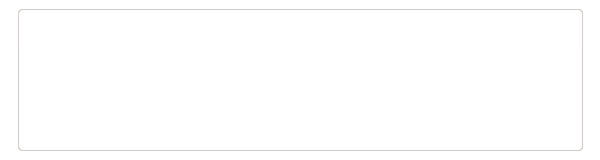
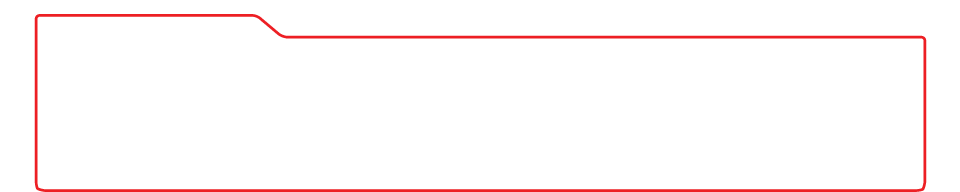
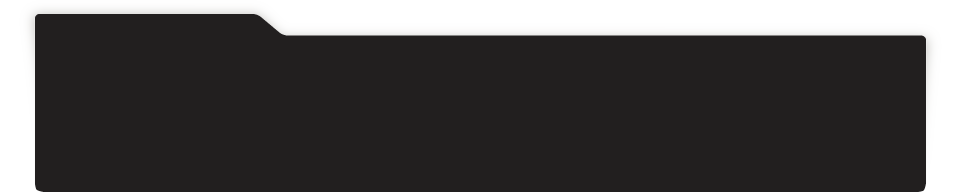
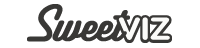
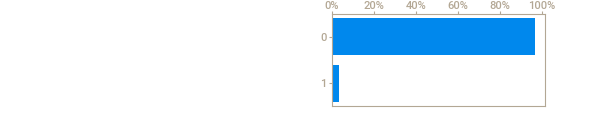
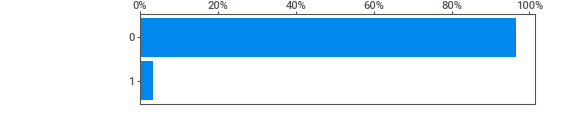
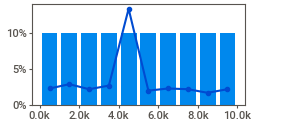
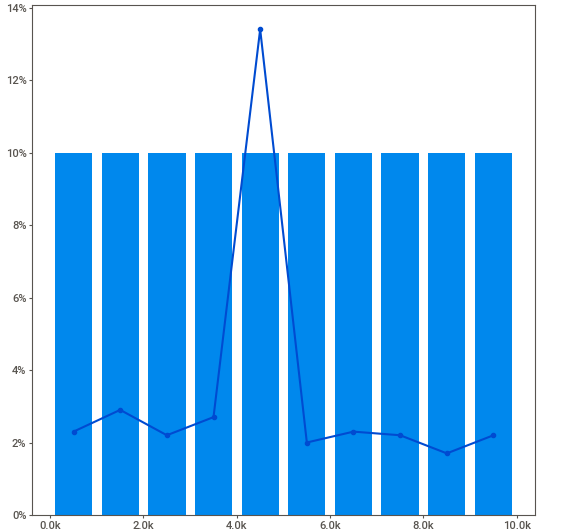
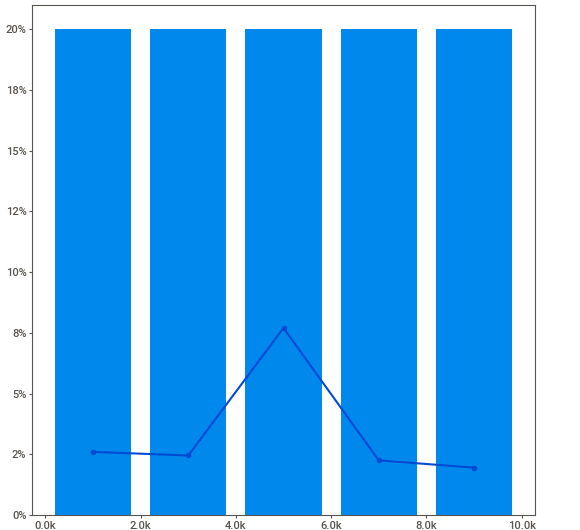
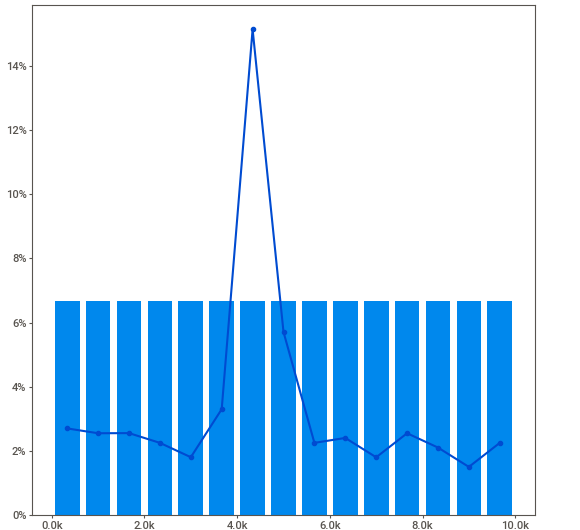
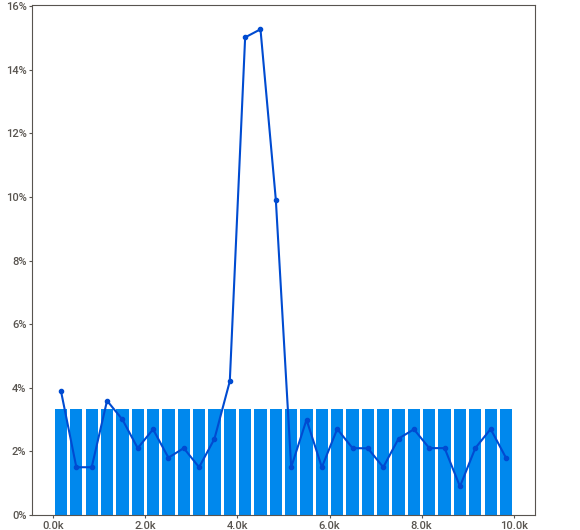
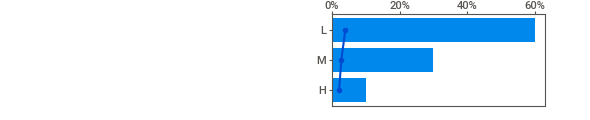
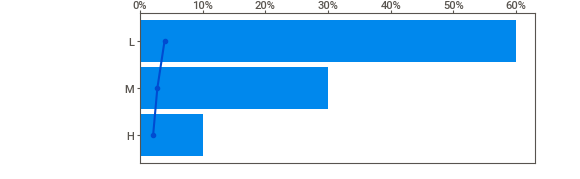
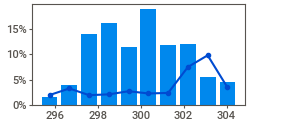
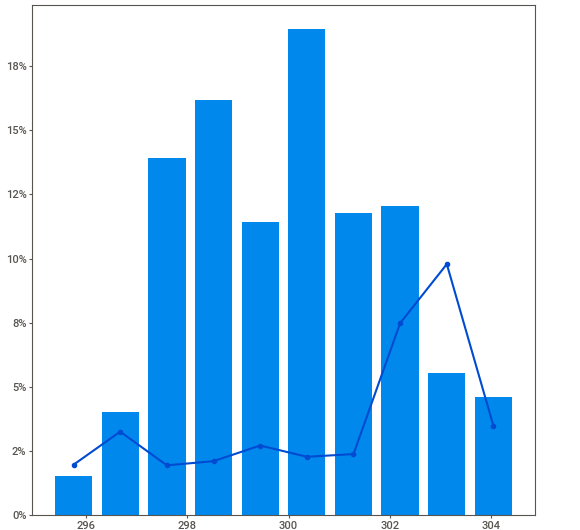
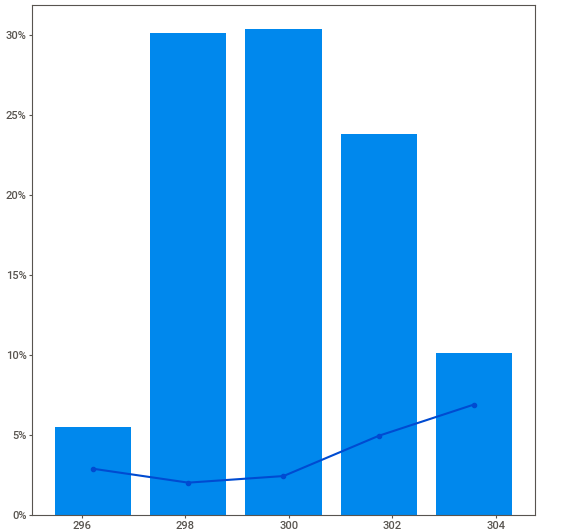
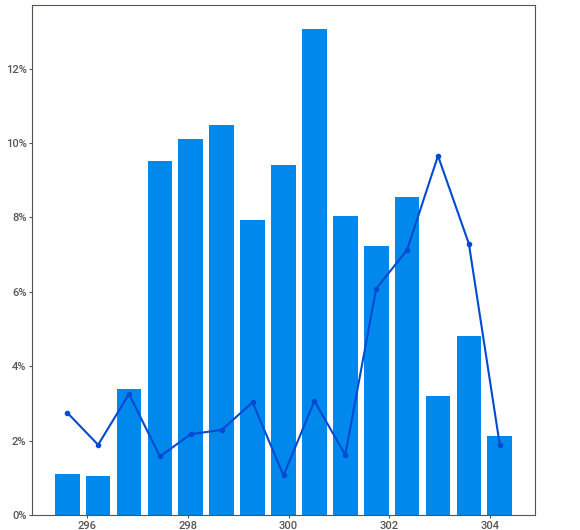
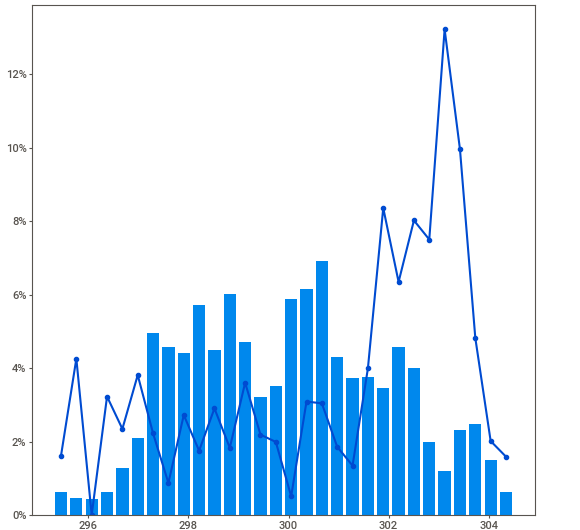
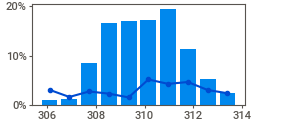
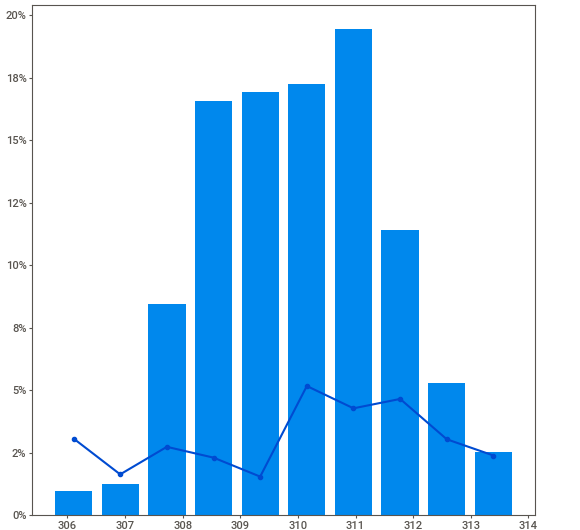
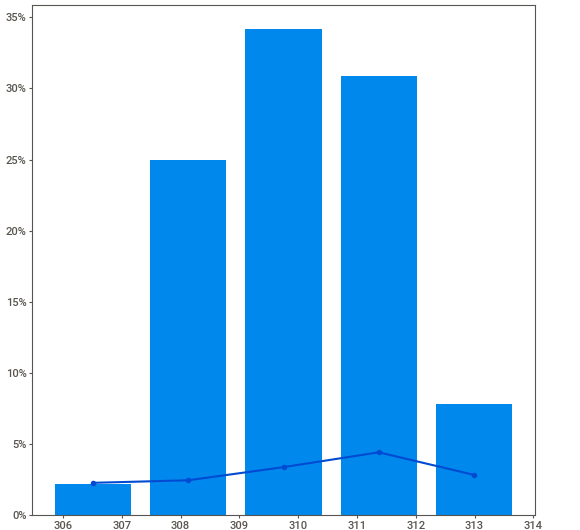
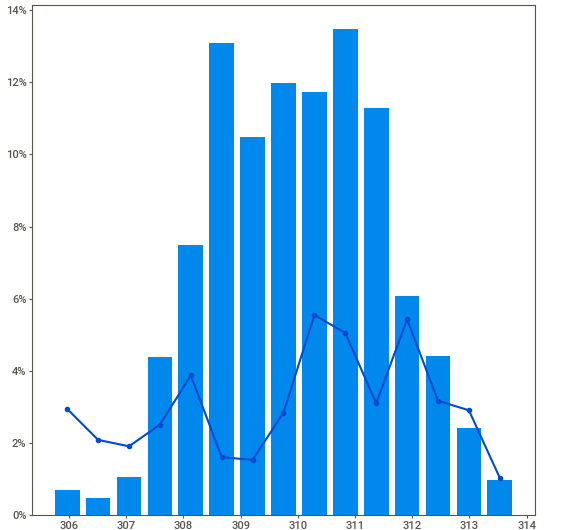
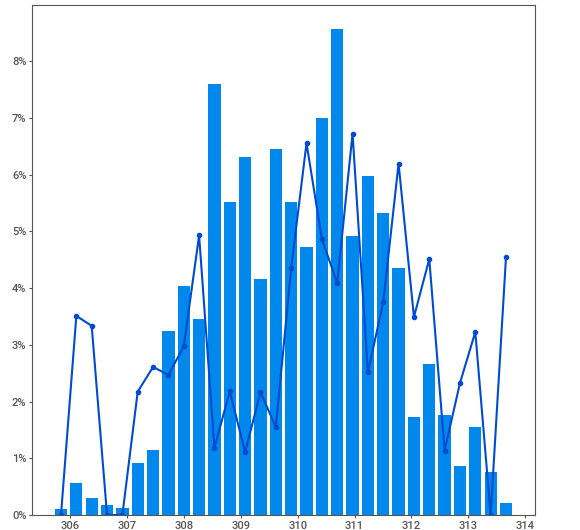
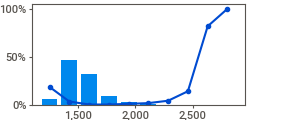
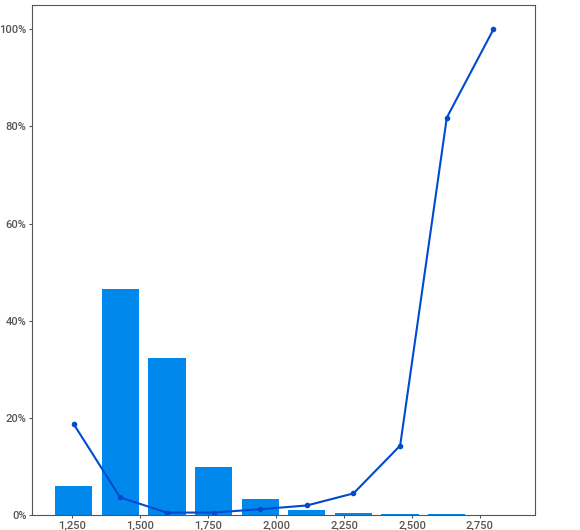
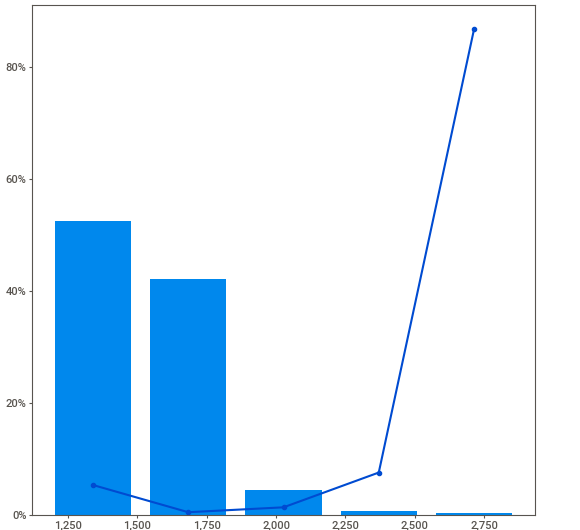
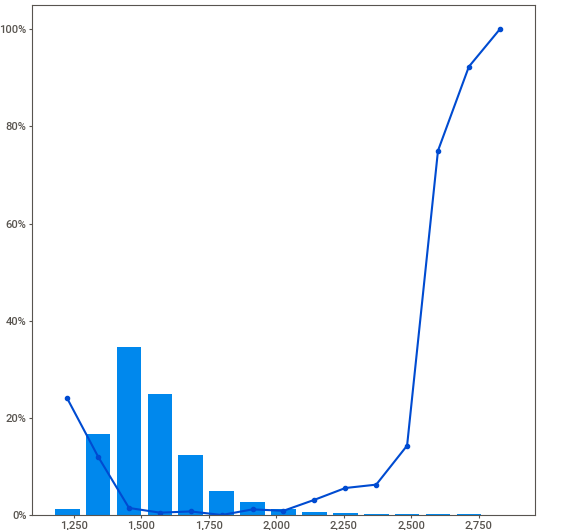
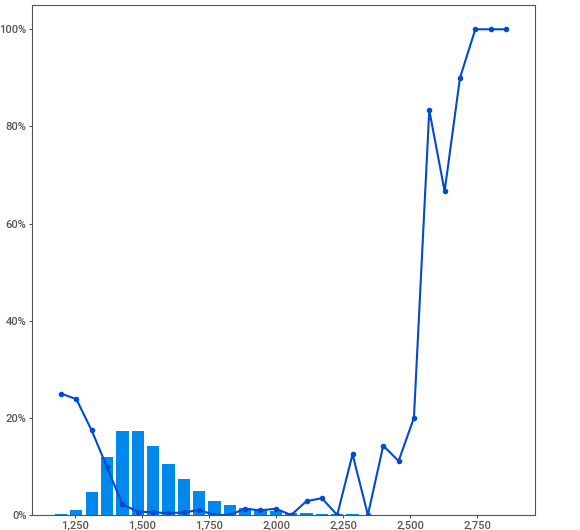
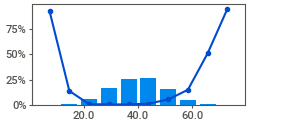
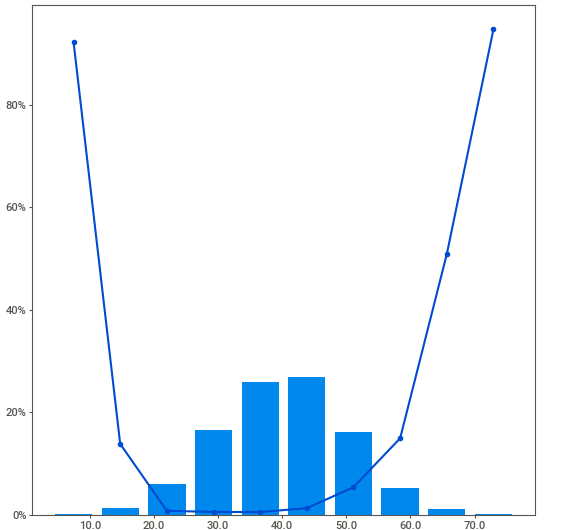
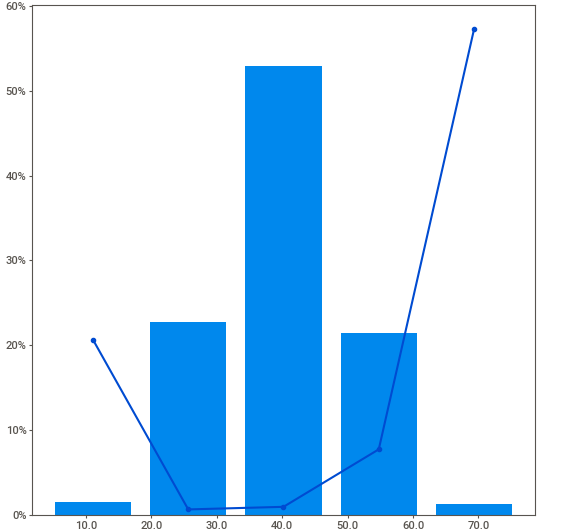
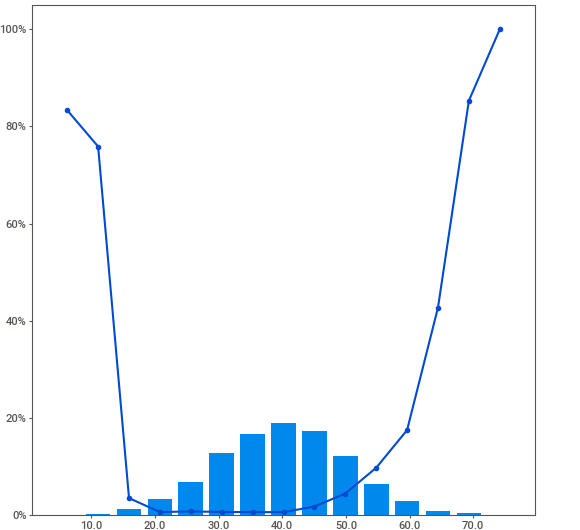
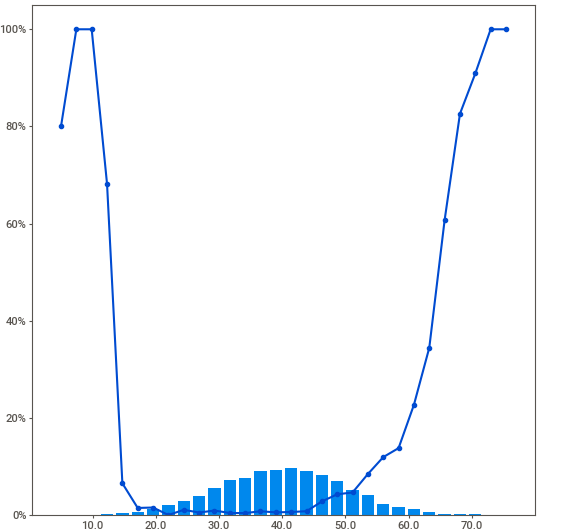
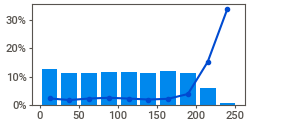
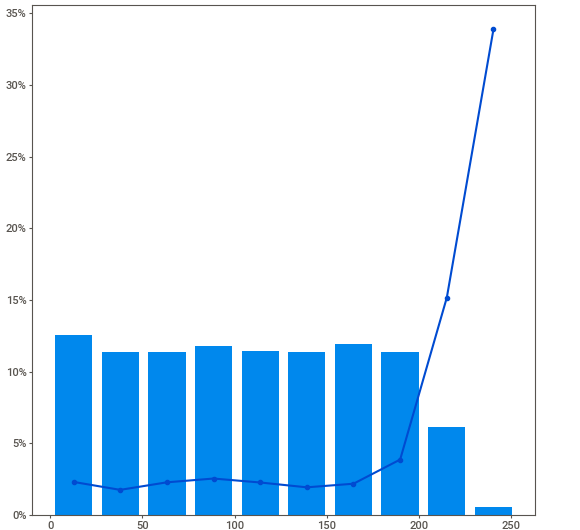
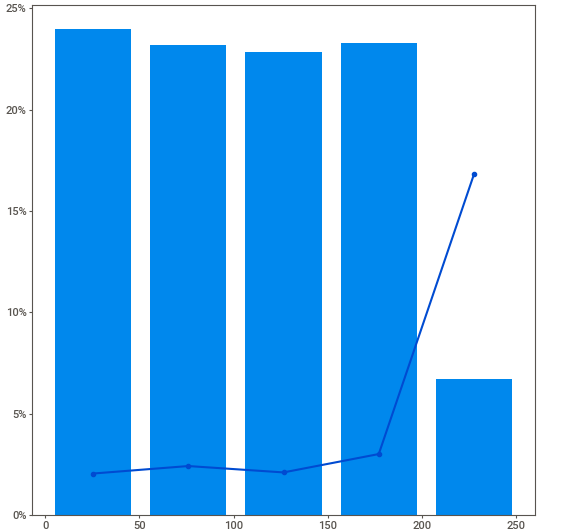
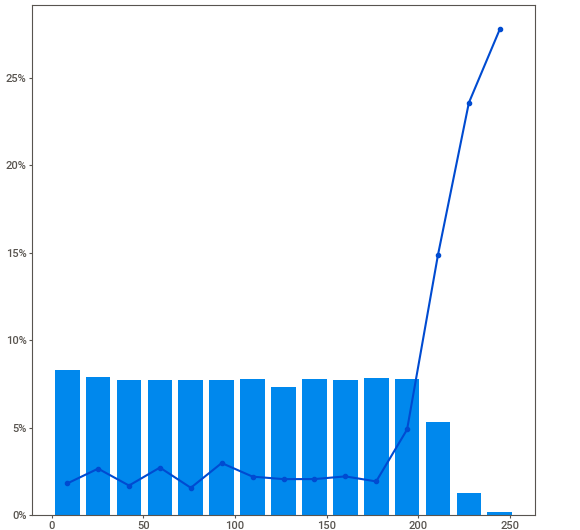
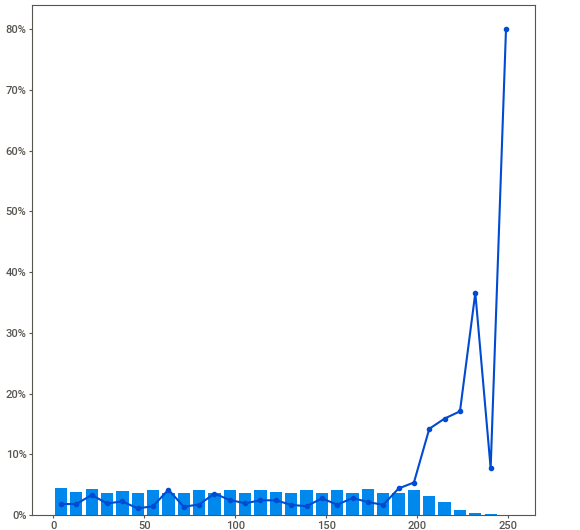
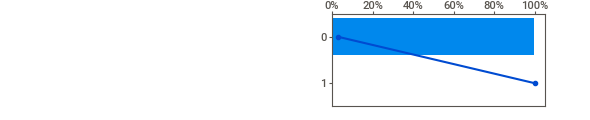
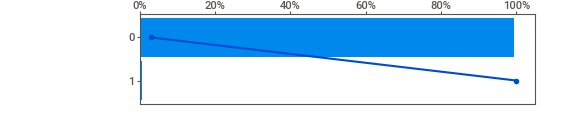
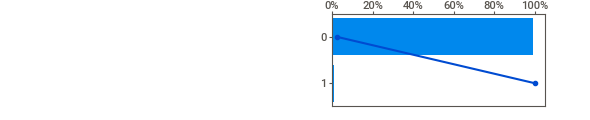
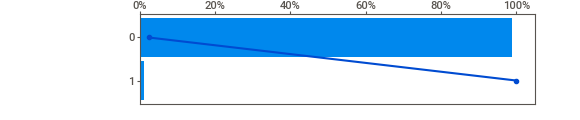
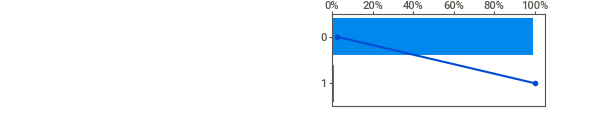
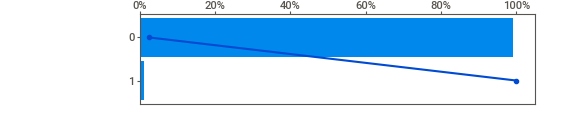
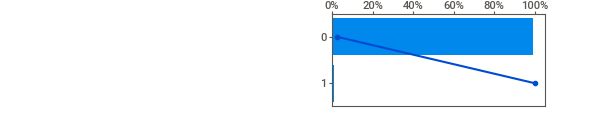
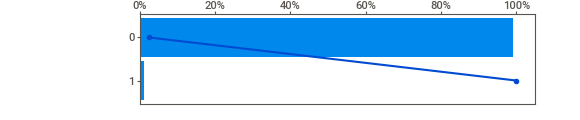
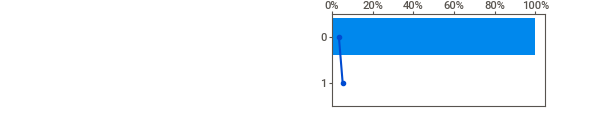
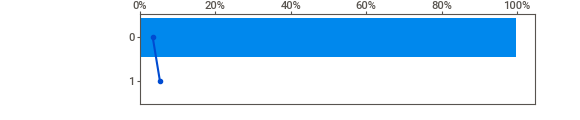
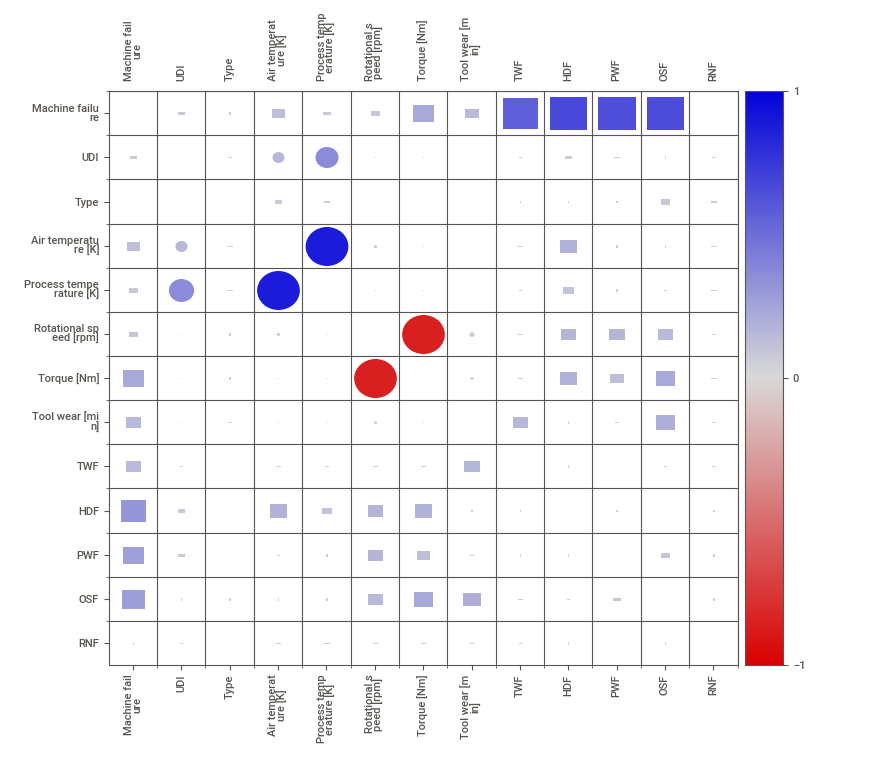
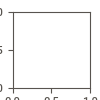

In [ ]:
# Exibição do relatório gerado pelo sweetviz
my_report.show_notebook()

# Pré-processamento dos dados

Sabe-se que um projeto de ciência de dados não se resume a um fluxo linear de etapas. São necessários várias idas e vindas de exploração dos dados, coletando novas estratégias e realizando diversos testes para se extrair o máximo de informações e conseguir obter o melhor resultado para o modelo de aprendizado de máquina desejado.

Nesse momento vamos realizar o processamento dos dados de acordo com o conhecimento do *data set* obtido até então e visando o treinamento dos modelos em seguida. Dessa forma, vamos remover atributos que julgamos irrelevantes, calcular novos atributos provenientes das variáveis originais, converter atributos categóricos em numéricos, separar os dados em amostras de treino e teste e realizar novas investigações a medida que for necessário.

In [36]:
# Cópia do data set original para um novo DataFrame (para evitar modificações indesejadas no conjunto original)
df_processado = df[['Type', 'Air temperature [K]', 'Process temperature [K]',	'Rotational speed [rpm]',	'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']].copy()

# Exibindo os (5) primeiros registros do DataFrame df_processado
df_processado.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Primeiramente, vamos desconsiderar os atributos *UID* e *Process ID*, já que eles são apenas números de identificação e não trazem nenhuma relevância para a determinação de uma falha no maquinário.

Em seguida, vamos incrementar ao novo *DataFrame* alguns novos atributos, baseados nos dados originais e cujas definições foram descritas nos modos de falha. Serão esses:

*   `Temperature diff [K] = |Process temperature [K] - Air temperature [K]|`
*   `Power required [W] = Torque [Nm] ⋅ Rotational speed [rad/s]`
*   `Overstrain [minNm] = Torque [Nm] ⋅ Tool wear [min]`



In [37]:
# Fator de conversão entre rpm e rad/s
rpm_to_rads = 0.10471975511965977

# Cálculo da diferença de temperatura (Process temperature [K] - Air temperature [K]) -> Define o modo de falha HDF
df_processado.insert(3, 'Temperature diff [K]', abs(df_processado['Process temperature [K]'] - df_processado['Air temperature [K]']))

# Cálculo da Potência requerida para o processo (Torque [Nm] * Rotational speed [rad/s]) -> Define o modo de falha PWF
df_processado.insert(6, 'Power required [W]', round(df_processado['Torque [Nm]'] * (df_processado['Rotational speed [rpm]'] * rpm_to_rads), 1))

# Cálculo do esforço da ferramenta (Torque [Nm] * Tool wear [min]) -> Define o modo de falha OSF
df_processado.insert(8, 'Overstrain [minNm]', df_processado['Torque [Nm]'] *  df_processado['Tool wear [min]'])

Em seguida, vamos transformar a variável categórica *Type* numa variável numérica discreta, com o objetivo de observar relações de correlação que esse atributo possa ter com o restante dos dados.

Após essas operações, vamos conferir como ficou o novo *DataFrame*.

In [38]:
# Mapeamento da variável Type em categorias (L = 0 | M = 1 | H = 2)
df_processado['Type'] = df_processado['Type'].map({'L': 0, 'M': 1, 'H': 2})

In [31]:
# Visualizando os (20) primeiros registros do DataFrame modificado
df_processado.head(20)

,Type,Air temperature [K],Process temperature [K],Temperature diff [K],Rotational speed [rpm],Torque [Nm],Power required [W],Tool wear [min],Overstrain [minNm],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,10.5,1551,42.8,6951.6,0,0.0,0,0,0,0,0,0
1,0,298.2,308.7,10.5,1408,46.3,6826.7,3,138.9,0,0,0,0,0,0
2,0,298.1,308.5,10.4,1498,49.4,7749.4,5,247.0,0,0,0,0,0,0
3,0,298.2,308.6,10.4,1433,39.5,5927.5,7,276.5,0,0,0,0,0,0
4,0,298.2,308.7,10.5,1408,40.0,5897.8,9,360.0,0,0,0,0,0,0
5,1,298.1,308.6,10.5,1425,41.9,6252.6,11,460.9,0,0,0,0,0,0
6,0,298.1,308.6,10.5,1558,42.4,6917.7,14,593.6,0,0,0,0,0,0
7,0,298.1,308.6,10.5,1527,40.2,6428.3,16,643.2,0,0,0,0,0,0
8,1,298.3,308.7,10.4,1667,28.6,4992.6,18,514.8,0,0,0,0,0,0
9,1,298.5,309.0,10.5,1741,28.0,5104.9,21,588.0,0,0,0,0,0,0


Espera-se que com os novos atributos diferentes correlações sejam observadas, uma vez que mais informação foi adicionada ao conjunto, e além disso, abre a possibilidade de desconsiderar alguns atributos originais sem perda de informação para o modelo de *machine learning*.

Vamos plotar um novo mapa de calor para observar as mudanaças:

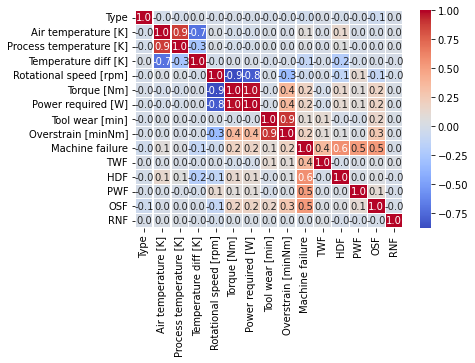

In [32]:
# Exibição do mapa de calor baseado nos novos atributos do DataFrame df_processado
sns.heatmap(df_processado.corr(), annot=True, cmap='coolwarm', linewidths='0.2', linecolor='white', fmt='0.1f');

Tendo em vista as novas correlações obtidas com os novos atributos e a conversão da variável *Type*, não se percebem grandes mudanças na relação entre os atributos e as variáveis alvo, mas ainda assim há uma leve melhora nos índices. Dessa forma, vou optar por essa estratégia para essa análise.

A variável *Type* não apresenta grande influência entre as demais e não parece ser determinante (ao menos num primeira análise), então podemos pensar em remover esse atributo da análise caso os resultados sejam impactados mais a frente.

Da mesma forma, as variáveis *Air temperature* e *Process temperature*, isoladamente, não estão atreladas as falhas. Logo, ao calcular o atributo *Temperature diff* temos uma única variável que traz a influência das duas anteriores e que tem influência direta sobre um tipo de falha (*HDF*). O mesmo pode ser pensado para *Torque* e *Rotational speed* (*PWF*). E *Torque* e *Tool wear* (*OSF*).

Assim, podemos cogitar utilizar apenas esses atributos conjugados para treinar o modelo mais a frente, caso necessário.

In [25]:
# Remoção da influência das variáveis originais que foram substituidas pelos Cálculos -> Com o objetivo de testar o modelo com diferentes configurações
# Atributos = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Temperature diff [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Power required [W]', 'Tool wear [min]', 'Overstrain [minNm]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
#df_processado.drop(['Air temperature [K]', 'Process temperature [K]'], axis=1, inplace=True)

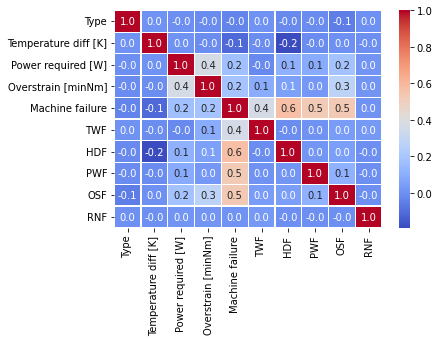

In [26]:
# Plot do mapa de calor utilizando apenas as variáveis calculadas a partir dos atributos originais
principais_colunas = ['Type', 'Temperature diff [K]', 'Power required [W]', 'Overstrain [minNm]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
sns.heatmap(df_processado[principais_colunas].corr(), annot=True, cmap='coolwarm', linewidths='0.2', linecolor='white', fmt='0.1f');

Considerando o caso desse conjunto de dados, não precisamos ter preocupação em tratar valores faltantes (uma vez que eles não estão presentes). E para os *outliers* vamos seguir com a estratégia descrita anteriormente (permanecer com eles, pois eles representam um forte indicativo de falha).



# Avaliação do modelo de *machine learning* e últimos pré-processamentos

Chegado a esse ponto, podemos considerar duas abordagens principais para um modelo preditivo:

1.   Modelo de classificação simples, onde, dada uma amostra, queremos definir se há falha no maquinário ou não;
2.   Modelo de classificação multiclasse, onde, dada uma amostra, queremos saber qual dos modos de falha é o mais provável no caso de haver uma falha.

A escolha do caminho a se seguir depende do propósito que se procura, uma vez que a ocorrência de um modo de falha correponde a uma falha do maquinário. Se prever uma falha for suficiente, a primeira alternativa satisfaz a necessidade. Se for interessante saber qual o modo resultou na falha, a segunda opção é mais interessante. Do ponto de vista do problema levantado (para uma manutenção preditiva), vou seguir com a problemática número `1`.


Definido o problema que vamos abordar, podemos remover os modos de falha da análise (*TWF*, *HDF*, *PWF*, *OSF* e *RNF*). Pois, não é necessário saber qual dos modos reultou na falha. Dessa forma, a variável alvo passa a ser apenas *Machine failure*. Além disso, dois dos modos de falha não são previsíveis (*TWF* e *RNF*), pois estão associados a troca da ferramenta e a eventos puramente randômicos.

Por último, existem amostras em que mais de um modo de falha está presente simultaneamente, fato que traria ainda mais complexidade na classificação do modo originador da falha.

In [39]:
# Exclusão dos modos de falha do DataFrame df_processado
df_processado.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

# Primeiros (10) registros do DataFrame df_processado
df_processado.head(10)

,Type,Air temperature [K],Process temperature [K],Temperature diff [K],Rotational speed [rpm],Torque [Nm],Power required [W],Tool wear [min],Overstrain [minNm],Machine failure
0,1,298.1,308.6,10.5,1551,42.8,6951.6,0,0.0,0
1,0,298.2,308.7,10.5,1408,46.3,6826.7,3,138.9,0
2,0,298.1,308.5,10.4,1498,49.4,7749.4,5,247.0,0
3,0,298.2,308.6,10.4,1433,39.5,5927.5,7,276.5,0
4,0,298.2,308.7,10.5,1408,40.0,5897.8,9,360.0,0
5,1,298.1,308.6,10.5,1425,41.9,6252.6,11,460.9,0
6,0,298.1,308.6,10.5,1558,42.4,6917.7,14,593.6,0
7,0,298.1,308.6,10.5,1527,40.2,6428.3,16,643.2,0
8,1,298.3,308.7,10.4,1667,28.6,4992.6,18,514.8,0
9,1,298.5,309.0,10.5,1741,28.0,5104.9,21,588.0,0


Em seguida, vamos separar os atributos da variável alvo. O objetivo é realizar alguns tipos de transformação nos atributos e mais a frente separarmos o conjunto de dados entre porção de treino e teste.

In [40]:
# DataFrame que receberá uma cópia do df_processado
x = df_processado.copy()

# Saparando a variável alvo (y) dos atributos que serão utilizados na predição (x)
y = x['Machine failure'].copy()
x.drop('Machine failure', axis=1, inplace=True)

# "Forma" do conjuntos de dados x: atributos preditivos e y: alvo
print(f'x = {x.shape}')
print(f'y = {y.shape}')

x = (10000, 9)
y = (10000,)


Então, vamos normalizar os atributos para remover efeitos das diferentes proporções de tamanho entre os valores, já que existem variáveis que estão na ordem de unidade e outras que chegam a dezenas de milhar.

Como os valores discrepantes são importantes e estão numa dimensão aceitável, uma normalização pelos valores `max` e `min` será suficiente.

In [41]:
# Importando o normalizador MinMaxScaler do módulo sci-kit learn
from sklearn.preprocessing import MinMaxScaler

# Instanciando o objeto scaler, utilizando o MinMaxScaler
scaler = MinMaxScaler()

# Normalizando o DataFrame x
x = scaler.fit_transform(x)

# Exibindo os dados de x normalizados
display(x)

array([[0.5       , 0.30434783, 0.35802469, ..., 0.62256075, 0.        ,
        0.        ],
       [0.        , 0.31521739, 0.37037037, ..., 0.60916162, 0.01185771,
        0.00841971],
       [0.        , 0.30434783, 0.34567901, ..., 0.70814783, 0.01976285,
        0.01497242],
       ...,
       [0.5       , 0.40217391, 0.35802469, ..., 0.49404066, 0.08695652,
        0.04454143],
       [1.        , 0.40217391, 0.37037037, ..., 0.64396288, 0.09881423,
        0.07349821],
       [0.5       , 0.40217391, 0.37037037, ..., 0.55422411, 0.11857708,
        0.0731042 ]])

In [44]:
# Exibindo os dados de y
display(y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [42]:
# Importando o divisor de dados train_test_split do módulo sci-kit learn
from sklearn.model_selection import train_test_split

# Separando os dados de x e y no conjunto de treino (x_train, y_train) e teste (x_test, y_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state=0)

# Exibindo alguns registros de cada porção de treino e teste
print(f'x_train = {x_train[0:1]}, {len(x_train)}\n')
print(f'x_test = {x_test[0:1]}\n')
print(f'y_train = {y_train[0:5]}\n')
print(f'y_test = {y_test[0:5]}')

x_train = [[0.         0.58695652 0.75308642 0.77777778 0.16006985 0.54807692
  0.58521697 0.85770751 0.57482573]], 7000

x_test = [[0.         0.26086957 0.30864198 0.64444444 0.09662398 0.67582418
  0.67108298 0.61660079 0.50118203]]

y_train = 7681    0
9031    0
3691    0
202     0
5625    0
Name: Machine failure, dtype: int64

y_test = 9394    0
898     0
2398    0
5906    0
2343    0
Name: Machine failure, dtype: int64


Por conseguinte, finalizado o tratamento dos dados para acolher o que se considera relevante, definindo o problema que queremos atacar e sua viabilidade, vamos partir para o modelo preditivo.

# Definições do modelo de *machine learning*

A primeira coisa que vem em mente ao pensar no modelo preditivo é o desbalanceamento da variável alvo e por consequência o modelo referência (*baseline*) que será utilizado como métrica de comparação com os modelos que serão treinados.

Para esse caso, podemos considerar como referência o simples fato de "chutar" o resultado como não tendo falha para todas as amostras. Com essa simples ação, obtemos um modelo altamente simples, mas que possui uma acurácia de `96.61%` para esse conjunto de dados.

In [18]:
# Acurácia do modelo base para essa amostra de dados
print(f"Baseline: {(((y < 1).sum()) / y.shape[0]) * 100:0.2f} %.")

Baseline: 96.61 %.


Obviamente que isso ocorre pelo desbalanceamento das classes do atributo alvo. Além disso, acurácia não é a única métrica de importância na avaliação de um modelo de classificação. Mas essa é uma base inicial importante para definir se um modelo treinado é viável ou não.

Vamos observar primeiramente os resultados sem utilizar técnicas de *sampling*, e caso necessário podemos recorrer a elas para tentar melhorar a solução.

Para um primeiro teste de modelo, vamos treinar um classificador *Random Forest*. Algoritmo esse que se encontra num meio termo entre complexidade e desempenho do ponto de vista computacional, por ser um modelo *ensemble*. Para isso vamos fazer uso do módulo `sci-kit learn`.

In [43]:
# Importando os módulos para cálculo das métricas de avaliação do modelo
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, matthews_corrcoef

# Importando o modelo de classificação Random Forest
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Instanciando o objeto com as definições para os parâmetros que serão utilizados no modelo
rf_model = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=3)

# Treinamento do modelo definido, com base nos dados de treino
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=11, n_jobs=None, oob_score=False,
                       random_state=3, verbose=0, warm_start=False)

In [45]:
# Realizando as predições com o modelo treinado -> utilizando os dados de teste
y_pred = rf_model.predict(x_test)

# Cálculo da acurácia obtida para o modelo
print(f'[Accuracy] Random Forest: {accuracy_score(y_test, y_pred)}')

# Cálculo do coeficiente de correlação de Matthews (MCC)
print(f'[MCC] Random Forest: {matthews_corrcoef(y_test, y_pred)}')

# Extração do relatório de classificação -> métricas obtidas para o modelo
print('\n[Classification Report] Random Forest')
print(classification_report(y_test, y_pred))

# Criação de um DataFrame com os resultados da matriz de confusão para o modelo
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['No_F', 'F'], columns=['pred_No_F', 'pred_F'])

[Accuracy] Random Forest: 0.9906666666666667
[MCC] Random Forest: 0.8475388186386629

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2901
           1       0.90      0.81      0.85        99

    accuracy                           0.99      3000
   macro avg       0.95      0.90      0.92      3000
weighted avg       0.99      0.99      0.99      3000



,pred_No_F,pred_F
No_F,2892,9
F,19,80


Os resultados mostram uma viabilidade na criação de um modelo preditivo, de fato. Numa primeira abordagem já foi possível obter uma acurácia superior ao do modelo base (*baseline*) e bons resultados para as outras métricas de avaliação (MCC principalmente). O que leva a crer que com uma melhor refinamento (*tuning*) do modelo e utilização de outra estratégias mencionadas (*sampling*, *feature engineering*, remoção de atributos de baixo valor informativo, etc.) possa se obter resultados ainda melhores.

Para a problemática de predição de falha, acredito que o principal tipo de erro a se observar são os falsos positivos (FP). Que correspondem a predição de não falha onde na verdade existia uma falha.

Nos casos de falha testados (`99`) esse tipo de erro aconteceu `19` vezes, ou seja, `≈ 19.2%` dos casos de falha real. Então, numa possibilidade de otimizar o modelo, buscaria reduzir esse número ao máximo.

--

Para avaliar diferentes modelos preditivos e suas métricas de desempenho, simultaneamente, vamos utilizar o módulo de AutoML `PyCaret`. Como uma alternativa de encontrar modelos que se adequem melhor ao conjunto de dados utilizado.


In [48]:
# Instalando o módulo PyCaret
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.3/504.3 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requ

In [ ]:
# Importando uma versão mais antiga do matplotlib -> Tentativa de corrigir erros de compatibilidade com o PyCaret
#!pip install matplotlib==3.1.3

In [8]:
# Importando os modelos de classificação
from pycaret.classification import *

# Definindo a função que inicializa o ambiente de treinamento e cria o pipeline de transformação
s = setup( df_processado
          ,target = 'Machine failure'
          ,numeric_features = [ 'Type' 
                               ,'Air temperature [K]'
                               ,'Process temperature [K]'
                               ,'Temperature diff [K]'
                               ,'Rotational speed [rpm]'
                               ,'Torque [Nm]'
                               ,'Power required [W]'
                               ,'Tool wear [min]'
                               ,'Overstrain [minNm]']
          #,log_experiment = True
          ,experiment_name = 'exp-teste-tec')

,Description,Value
0,Session id,3817
1,Target,Machine failure
2,Target type,Binary
3,Original data shape,"(10000, 10)"
4,Transformed data shape,"(10000, 10)"
5,Transformed train set shape,"(7000, 10)"
6,Transformed test set shape,"(3000, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [9]:
# Relatório comparativo dos modelos -> Variável best recebe o modelo que melhor se adequou aos dados
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9933,0.9823,0.8226,0.9754,0.8896,0.8862,0.8911,1.0890
rf,Random Forest Classifier,0.9924,0.9723,0.8060,0.9677,0.8746,0.8707,0.8772,0.8120
lightgbm,Light Gradient Boosting Machine,0.9896,0.9771,0.7464,0.9347,0.8232,0.8180,0.8268,0.2220
dt,Decision Tree Classifier,0.9881,0.9122,0.8308,0.8211,0.8229,0.8168,0.8184,0.0660
et,Extra Trees Classifier,0.9869,0.9738,0.6460,0.9539,0.7667,0.7602,0.7774,0.3560
ada,Ada Boost Classifier,0.9796,0.9580,0.5404,0.7966,0.6384,0.6284,0.6437,0.3150
knn,K Neighbors Classifier,0.9773,0.7976,0.4149,0.8251,0.5413,0.5316,0.5694,0.0740
lr,Logistic Regression,0.9704,0.9201,0.2533,0.6913,0.3648,0.3531,0.4028,0.5900
ridge,Ridge Classifier,0.9677,0.0000,0.0549,0.6500,0.1006,0.0972,0.1827,0.0350
dummy,Dummy Classifier,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Com os resultados obtidos pela comparação dos modelos de classificação utilizando o `PyCaret` é possível ver que o agoritmo `gbc` (*Gradient Boosting Classifier*) foi o que melhor se adequou ao conjunto de dados, entregando os melhores resultados para quase todas as métricas de avaliação de desempenho.

Podemos ver também, que o modelo `rf` (*Random Forest*) foi o segundo mais eficiente, o que mostra que tivemos um bom palpite inicial como modelo de escolha. Palpite este que não foi por acaso, pois, como o problema define bem os critérios e limiares que determinam uma falha, induzi que um modelo baseado em árvores de decisão seria uma boa escolha.

Decidi então seguir mais uma vez com a criação do modelo baseado no algoritmo *Random Forest*:

In [10]:
# Criando o modelo Random Forest -> Segundo melhor modelo avaliado na comparação
rf = create_model('rf', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9943,0.9991,0.9565,0.8800,0.9167,0.9137,0.9146
1,0.9914,0.9896,0.7826,0.9474,0.8571,0.8528,0.8569
2,0.9886,0.9611,0.6957,0.9412,0.8000,0.7943,0.8039
3,0.9929,0.9734,0.7917,1.0000,0.8837,0.8801,0.8865
4,0.9957,0.9482,0.8750,1.0000,0.9333,0.9311,0.9333
5,0.9929,0.9499,0.8333,0.9524,0.8889,0.8852,0.8873
6,0.9943,0.9987,0.8333,1.0000,0.9091,0.9062,0.9102
7,0.9957,0.9734,0.9167,0.9565,0.9362,0.9340,0.9342
8,0.9857,0.9367,0.5833,1.0000,0.7368,0.7300,0.7582


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

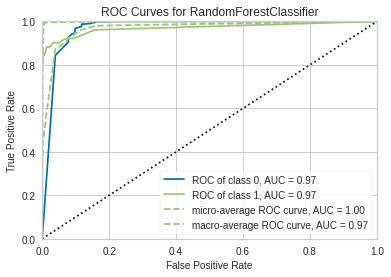

In [11]:
# Plot da curva ROC para o modelo rf
plot_model(rf, plot = 'auc')

Para ilustração das funcionalidades do módulo, plotei a curva `ROC` para o modelo `rf` criado e em seguida achei que seria interessante ver quais os atributos que foram mais informativos para o modelo.

Como esperado (de certa forma), as variáveis calculadas a partir dos atributos originais foram bem informativas para o modelo, sendo mais importantes do que quase todas as variáveis iniciais, exceto pela velocidade de rotação.

Da mesma forma, como já havia mencionado, a diferença de temperatura sozinha entregou mais valor do que as duas variáveis de temperatura originais somadas.

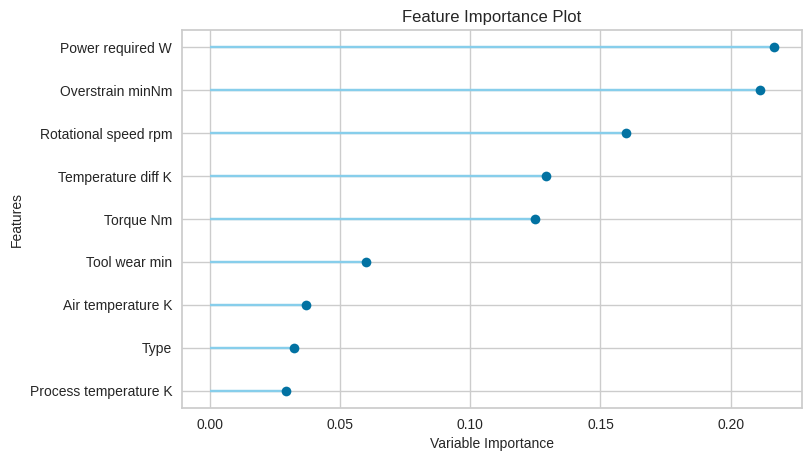

In [12]:
# Plot dos atributos mais importantes no treinamento do modelo
plot_model(rf, plot = 'feature')

In [13]:
# Finalizando o modelo com os parâmetros usados na criação e treinamento
rf_final = finalize_model(rf)

Observadas essas informações importantes, seguimos para a finalização do modelo criado, salvando o mesmo no arquivo `modelo-final.pkl`

In [14]:
# Salvando o modelo finalizado no arquivo modelo-final
save_model(rf_final,'modelo-final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Type', 'Air temperature [K]',
                                              'Process temperature [K]',
                                              'Temperature diff [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [N...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None, max_samples=N

Para finalizar o fluxo do projeto, com todas as informações e resultados obtidos até então, vamos carregar o modelo salvo no passo anterior e realizar predições com ele.

Ao final, comparamos os resultados das predições com o *data set* original.

In [15]:
# Listagem dos arquivos
!ls

logs.log  modelo-final.pkl  sample_data


In [21]:
# Carregando o modelo salvo
modelo_teste = load_model('modelo-final')

Transformation Pipeline and Model Successfully Loaded


In [22]:
# Definindo o DataFrame de teste -> Sem a variável alvo
data_teste = df_processado[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Temperature diff [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Power required [W]', 'Tool wear [min]', 'Overstrain [minNm]']].copy()

In [29]:
# Utilizando o DataFrame de teste para fazer previsões
predict_model(modelo_teste, data=data_teste)

,Type,Air temperature [K],Process temperature [K],Temperature diff [K],Rotational speed [rpm],Torque [Nm],Power required [W],Tool wear [min],Overstrain [minNm],prediction_label,prediction_score
0,1,298.100006,308.600006,10.5,1551,42.799999,6951.600098,0,0.000000,0,1.0
1,0,298.200012,308.700012,10.5,1408,46.299999,6826.700195,3,138.899994,0,1.0
2,0,298.100006,308.500000,10.4,1498,49.400002,7749.399902,5,247.000000,0,1.0
3,0,298.200012,308.600006,10.4,1433,39.500000,5927.500000,7,276.500000,0,1.0
4,0,298.200012,308.700012,10.5,1408,40.000000,5897.799805,9,360.000000,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.799988,308.399994,9.6,1604,29.500000,4955.100098,14,413.000000,0,1.0
9996,2,298.899994,308.399994,9.5,1632,31.799999,5434.700195,17,540.599976,0,1.0
9997,1,299.000000,308.600006,9.6,1645,33.400002,5753.600098,22,734.799988,0,1.0
9998,2,299.000000,308.700012,9.7,1408,48.500000,7151.100098,25,1212.500000,0,1.0


In [30]:
# Comparativo com os valores reais da variável alvo do DataFrame original
df_processado

,Type,Air temperature [K],Process temperature [K],Temperature diff [K],Rotational speed [rpm],Torque [Nm],Power required [W],Tool wear [min],Overstrain [minNm],Machine failure
0,1,298.1,308.6,10.5,1551,42.8,6951.6,0,0.0,0
1,0,298.2,308.7,10.5,1408,46.3,6826.7,3,138.9,0
2,0,298.1,308.5,10.4,1498,49.4,7749.4,5,247.0,0
3,0,298.2,308.6,10.4,1433,39.5,5927.5,7,276.5,0
4,0,298.2,308.7,10.5,1408,40.0,5897.8,9,360.0,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,9.6,1604,29.5,4955.1,14,413.0,0
9996,2,298.9,308.4,9.5,1632,31.8,5434.7,17,540.6,0
9997,1,299.0,308.6,9.6,1645,33.4,5753.6,22,734.8,0
9998,2,299.0,308.7,9.7,1408,48.5,7151.1,25,1212.5,0
